In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Data Cleaning
from sklearn.feature_extraction.text import CountVectorizer

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from xgboost.sklearn import XGBClassifier

# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek

## Raw Datasets

In [6]:
survey = pd.read_csv('C:/Users/49177/Desktop/Humboldt material/Semester 5/Numerical course/archive/Starbucks satisfactory survey.csv')
survey.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

### Data Cleaning

In [8]:
sb = survey.copy()


#### Drop clumns

In [9]:
#we drop the column Timestam since it's irrelavant to our pupose
sb.drop(columns=['Timestamp'], inplace = True)

In [10]:
#rename the columns to amke it easier to view
sb.rename({'1. Your Gender' : 'Gender', '2. Your Age' : 'Age', '3. Are you currently....?' : 'Working_Status', '4. What is your annual income?' : 'Annual_Income', '5. How often do you visit Starbucks?' : 'Visit_Duration', '6. How do you usually enjoy Starbucks?' : 'Visit_Plan', '7. How much time do you normally  spend during your visit?' : 'Spending_Time', "8. The nearest Starbucks's outlet to you is...?" : 'Outlet_Location', '9. Do you have Starbucks membership card?' : 'Member_Card', '10. What do you most frequently purchase at Starbucks?' : 'Frequent_Purchase', '11. On average, how much would you spend at Starbucks per visit?' : 'Average_Spending', '12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Product_Rating', '13. How would you rate the price range at Starbucks?' : 'Price_Rating', '14. How important are sales and promotions in your purchase decision?' : 'Promotion_Rating', '15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)' : 'Ambiance_Rating', '16. You rate the WiFi quality at Starbucks as..' : 'Wifi_Rating', '17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)' : 'Service_Rating', '18. How likely you will choose Starbucks for doing business meetings or hangout with friends?' : 'Hangout_Place_Rating', '19. How do you come to hear of promotions at Starbucks? Check all that apply.' : 'Promotion_Tools', '20. Will you continue buying at Starbucks?' : 'Loyal_Customer'} , inplace = True , axis = 1)

In [11]:
#missing values
sb.isna().sum()/len(sb.index)*100

Gender                  0.000000
Age                     0.000000
Working_Status          0.000000
Annual_Income           0.000000
Visit_Duration          0.000000
Visit_Plan              0.819672
Spending_Time           0.000000
Outlet_Location         0.000000
Member_Card             0.000000
Frequent_Purchase       0.000000
Average_Spending        0.000000
Product_Rating          0.000000
Price_Rating            0.000000
Promotion_Rating        0.000000
Ambiance_Rating         0.000000
Wifi_Rating             0.000000
Service_Rating          0.000000
Hangout_Place_Rating    0.000000
Promotion_Tools         0.819672
Loyal_Customer          0.000000
dtype: float64

In [13]:
##Feature's value checking
##visit plan
sb['Visit_Plan'].unique()

array(['Dine in', 'Take away', 'Drive-thru', 'never', 'Never buy', nan,
       'I dont like coffee', 'Never', 'Never '], dtype=object)

In [14]:
sb['Visit_Plan'].replace(['never', 'Never buy', 'I dont like coffee', 'Never', 'Never ',], 'Never buy', inplace = True)
sb['Visit_Plan'].value_counts()

Take away     49
Dine in       46
Drive-thru    20
Never buy      6
Name: Visit_Plan, dtype: int64

In [15]:
##frequent purchase
sb['Frequent_Purchase'].unique()

array(['Coffee', 'Cold drinks;Pastries', 'Coffee;Sandwiches',
       'Cold drinks', 'Coffee;Cold drinks',
       'Cold drinks;Pastries;Sandwiches',
       'Coffee;Juices;Pastries;Sandwiches', 'Coffee;Pastries;Sandwiches',
       'Coffee;Pastries', 'Cold drinks;Juices;Pastries',
       'Coffee;Cold drinks;Pastries;Sandwiches', 'Never', 'Never buy any',
       'Jaws chip ', 'cake ', 'Pastries', 'Cold drinks;Never', 'never',
       'Nothing ', 'Coffee;Cold drinks;Juices;Pastries;Sandwiches'],
      dtype=object)

In [16]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
purchase = cvr.fit_transform(sb['Frequent_Purchase'])

print(cvr.get_feature_names())

['cake ', 'coffee', 'cold drinks', 'jaws chip ', 'juices', 'never', 'never buy any', 'nothing ', 'pastries', 'sandwiches']


In [17]:
purchase_value = pd.DataFrame(purchase.toarray(), columns = cvr.get_feature_names())
purchase_value['Never_Buy']= purchase_value.iloc[:, -6:-3].sum(axis=1)

purchase_value.drop(columns=['never', 'never buy any', 'nothing '], inplace = True)

purchase_value.rename({'cake ' : 'Buy_Cake', 'coffee' : 'Buy_Coffee', 'cold drinks' : 'Buy_ColdDrinks', 'jaws chip ' : 'Buy_JawsChip', 'juices' : 'Buy_Juices', 'pastries' : 'Buy_Pastries', 'sandwiches' : 'Buy_Sandwiches'}, inplace = True , axis = 1)

sb = pd.concat([sb, purchase_value], axis = 1)
sb

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Frequent_Purchase,...,Promotion_Tools,Loyal_Customer,Buy_Cake,Buy_Coffee,Buy_ColdDrinks,Buy_JawsChip,Buy_Juices,Buy_Pastries,Buy_Sandwiches,Never_Buy
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,0,0,0,0,0,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,Social Media;In Store displays,Yes,0,0,1,0,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,In Store displays;Billboards,Yes,0,1,0,0,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,Through friends and word of mouth,No,0,1,0,0,0,0,0,0
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,Starbucks Website/Apps;Social Media,Yes,0,1,0,0,0,0,0,0
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,1,0,1,1,1,1
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,Social Media;Through friends and word of mouth...,No,0,1,1,0,0,0,0,0
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,Social Media;Through friends and word of mouth...,Yes,0,1,0,0,0,0,0,0


#### promotion tools

In [18]:
sb['Promotion_Tools'].unique()

array(['Starbucks Website/Apps;Social Media;Emails;Deal sites (fave, iprice, etc...)',
       'Social Media;In Store displays', 'In Store displays;Billboards',
       'Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media', 'Social Media',
       'Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth',
       'Social Media;Through friends and word of mouth;In Store displays',
       'Starbucks Website/Apps', 'Emails', 'Social Media;Emails',
       'Through friends and word of mouth;In Store displays',
       'Social Media;In Store displays;Billboards', 'Application offer',
       'Starbucks Website/Apps;Social Media;Through friends and word of mouth;In Store displays',
       'In Store displays',
       'Social Media;Through friends and word of mouth;Billboards',
       'Starbucks Website/Apps;Social Me

In [19]:
##replacing the missing values with mode
sb['Promotion_Tools'].replace([np.nan,], 'Social Media', inplace = True)

In [20]:
cvr = CountVectorizer(tokenizer = lambda x:x.split(';'))
promo = cvr.fit_transform(sb['Promotion_Tools'])

print(cvr.get_feature_names())

['application offer', 'billboards', 'deal sites (fave, iprice, etc...)', 'emails', 'in store displays', 'never hear', 'social media', 'starbucks website/apps', 'through friends and word of mouth']


In [21]:
promo_value = pd.DataFrame(promo.toarray(), columns = cvr.get_feature_names())

promo_value.rename({'application offer' : 'Promo_AppsOffer', 'billboards' : 'Promo_Billboards', 'deal sites (fave, iprice, etc...)' : 'Promo_Sites', 'emails' : 'Promo_Emails', 'in store displays' : 'Promo_StoreDisplay', 'never hear' : 'Never_Heard', 'social media' : 'Promo_SocMed', 'starbucks website/apps' : 'Promo_SBucksApps', 'through friends and word of mouth' : 'Promo_WoM'} , inplace = True , axis = 1)

sb = pd.concat([sb, promo_value], axis = 1)
sb

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Frequent_Purchase,...,Never_Buy,Promo_AppsOffer,Promo_Billboards,Promo_Sites,Promo_Emails,Promo_StoreDisplay,Never_Heard,Promo_SocMed,Promo_SBucksApps,Promo_WoM
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,...,0,0,0,1,1,0,0,1,1,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,...,0,0,0,0,0,1,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,...,0,0,1,0,0,1,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,...,0,0,0,0,0,0,0,0,0,1
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Male,40 and above,Self-employed,"RM25,000 - RM50,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee,...,0,0,0,0,0,0,0,1,1,0
118,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 1 hour to 2 hours,1km - 3km,Yes,Coffee;Cold drinks;Juices;Pastries;Sandwiches,...,1,0,1,1,1,1,0,1,1,1
119,Male,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Cold drinks,...,0,0,0,0,0,1,0,1,0,1
120,Female,From 20 to 29,Employed,"Less than RM25,000",Rarely,Take away,Below 30 minutes,within 1km,No,Coffee,...,0,0,1,0,0,0,0,1,0,1


In [22]:
sb.drop(columns=['Frequent_Purchase', 'Promotion_Tools'], inplace = True)

### Datasets

In [24]:
sbucks = sb.copy()
sbucks.head()
#Dataset have 35 columns of features and 122 rows.

,Gender,Age,Working_Status,Annual_Income,Visit_Duration,Visit_Plan,Spending_Time,Outlet_Location,Member_Card,Average_Spending,...,Never_Buy,Promo_AppsOffer,Promo_Billboards,Promo_Sites,Promo_Emails,Promo_StoreDisplay,Never_Heard,Promo_SocMed,Promo_SBucksApps,Promo_WoM
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Less than RM20,...,0,0,0,1,1,0,0,1,1,0
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Less than RM20,...,0,0,0,0,0,1,0,1,0,0
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Less than RM20,...,0,0,1,0,0,1,0,0,0,0
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Less than RM20,...,0,0,0,0,0,0,0,0,0,1
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Around RM20 - RM40,...,0,0,0,0,0,0,0,1,1,0


### PreProcessing

- OneHotEncoding: Gender, Age, Working_Status, Annual_Income, Visit_Duration, Spending_Time, Outlet_Location, Member_Card, Average_Spending
- Simple Imputer Most Frequent: Visit_Plan
- PassThrough: Product_Rating, Price_Rating, Promotion_Rating, Ambiance_Rating, Wifi_Rating, Service_Rating, Hangout_Place_Rating, Buy_Cake, Buy_Coffee, Buy_ColdDrinks, Buy_JawsChip, Buy_Juices, Buy_Pastries, Buy_Sandwiches, Never_Buy, Promo_AppsOffer, Promo_Billboards, Promo_Sites, Promo_Emails, Promo_StoreDisplay, Never_Hear, Promo_SocMed, Promo_SBucksApps, Promo_WoM
- Target: Loyal_Customer

In [25]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Age', 'Working_Status', 'Annual_Income', 'Visit_Duration', 'Spending_Time', 'Outlet_Location', 'Member_Card', 'Average_Spending']),
    ('mode_onehot_pipe', mode_onehot_pipe, ['Visit_Plan']),
], remainder = 'passthrough')

##### define the target variable

In [26]:
sbucks['Loyal_Customer'].value_counts()/sbucks.shape[0]*100

Yes    77.04918
No     22.95082
Name: Loyal_Customer, dtype: float64

In [27]:
sbucks['Loyal_Customer'] = np.where(sbucks['Loyal_Customer'] == 'Yes', 1, 0)

##### splitting the data

In [28]:
X = sbucks.drop('Loyal_Customer', axis = 1)
y = sbucks['Loyal_Customer']

X.shape
# we have in total 34 features

(122, 34)

In [29]:
#I use 0.3 as default score for test_size and X.shape for random_state so the data will be devided equally.
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 3434)

#### Modeling

In [30]:
logreg = LogisticRegression(random_state = 3434)
tree = DecisionTreeClassifier(random_state = 3434)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 3434)
svc = LinearSVC(random_state = 3434)
ada = AdaBoostClassifier(random_state = 3434)
grad = GradientBoostingClassifier(random_state = 3434)
xgb = XGBClassifier(verbosity = 0, random_state = 3434)

In [31]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
ada_pipe = Pipeline([('transformer', transformer), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgb', xgb)])



,method,accuracy score
0,Logistic Regression,0.864865
1,Decision Tree Classifier,0.810811
2,KNN Classifier,0.783784
3,Random Forest Classifier,0.783784
4,LinearSVC,0.756757
5,AdaBoost Classifier,0.891892
6,Gradient Boosting Classifier,0.810811
7,XGB Classifier,0.810811


In [51]:
# train model
from sklearn.utils import resample

logreg_pipe.fit(X_train, y_train)

# bootstrap predictions
accuracy = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train, y_train, replace=True)
    # make predictions
    y_hat = logreg_pipe.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy.append(score)
    

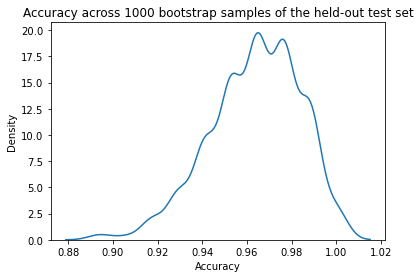

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot distribution of accuracy
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set")
plt.xlabel("Accuracy")
plt.show()

In [48]:
# get median
median = np.percentile(accuracy, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy, alpha/2)
upper_ci = np.percentile(accuracy, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.96 with a 95% a confidence interval of [0.92,1.00].


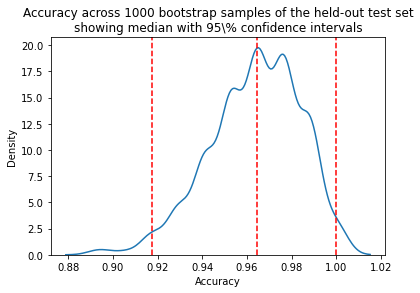

In [49]:
sns.kdeplot(accuracy)
plt.title("Accuracy across 1000 bootstrap samples of the held-out test set\n"
          "showing median with 95\\% confidence intervals")
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()

In [32]:
##calculating the accurancies with cross validation

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, svc_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(X_train, y_train)

score_acc = [accuracy_score(y_test, logreg_pipe.predict(X_test)),
             accuracy_score(y_test, tree_pipe.predict(X_test)),
             accuracy_score(y_test, knn_pipe.predict(X_test)),
             accuracy_score(y_test, rf_pipe.predict(X_test)),
             accuracy_score(y_test, svc_pipe.predict(X_test)),
             accuracy_score(y_test, ada_pipe.predict(X_test)),
             accuracy_score(y_test, grad_pipe.predict(X_test)),
             accuracy_score(y_test, xgb_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier', 'LinearSVC', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']

acc_summary = pd.DataFrame({'method': method_name, 'accuracy score': score_acc})
acc_summary

,method,accuracy score
0,Logistic Regression,0.864865
1,Decision Tree Classifier,0.810811
2,KNN Classifier,0.783784
3,Random Forest Classifier,0.783784
4,LinearSVC,0.756757
5,AdaBoost Classifier,0.891892
6,Gradient Boosting Classifier,0.810811
7,XGB Classifier,0.810811
